# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

You have two days to do this study

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder , StandardScaler , Normalizer , LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [2]:
campaign_df = pd.read_excel("C:/Users/edenl/Desktop/ia_coding/notebooks/mall_customers/marketing_campaign.xlsx")
campaign_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
campaign_df.shape

(2240, 29)

# EDA

In [4]:
#lets drop columns 
campaign_df1 = campaign_df.drop(["Z_CostContact" , "Z_Revenue", "ID" , "Year_Birth" , "Dt_Customer" , "AcceptedCmp4" , "AcceptedCmp3" , "AcceptedCmp2" , "AcceptedCmp1" ,"AcceptedCmp5"] , axis=1)
campaign_df1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0
2238,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0


In [5]:
#lets see if there is nan values
campaign_df.isnull().values.any()

True

In [6]:
campaign_df1.dropna(inplace=True)

In [7]:
campaign_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [8]:
x = campaign_df1.Income

In [9]:
y = campaign_df1.Recency

C:\Users\edenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='Recency'>

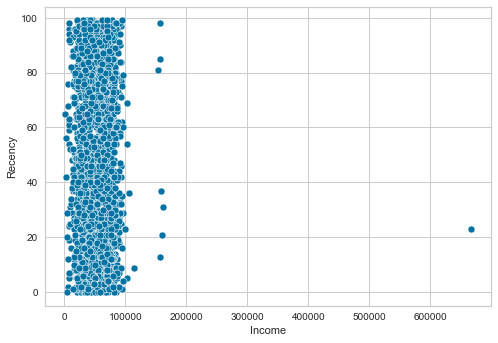

In [10]:
sns.scatterplot( x , y)

In [11]:
x = campaign_df1.Recency

In [12]:
y = campaign_df1.NumCatalogPurchases

C:\Users\edenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency', ylabel='NumCatalogPurchases'>

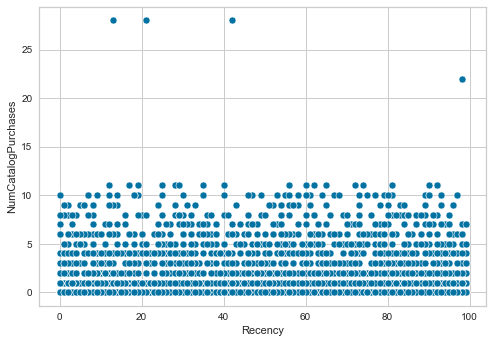

In [13]:
sns.scatterplot( x , y)

In [14]:
y = campaign_df1.NumStorePurchases

C:\Users\edenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency', ylabel='NumStorePurchases'>

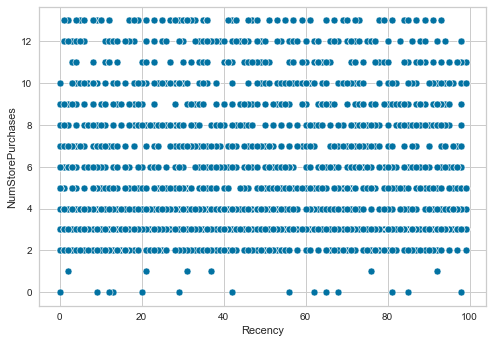

In [15]:
sns.scatterplot( x , y)

In [16]:
x = campaign_df1.Recency

In [17]:
y = campaign_df1.NumWebPurchases

C:\Users\edenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency', ylabel='NumWebPurchases'>

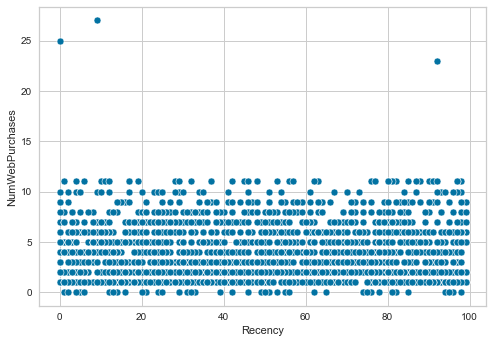

In [18]:
sns.scatterplot( x , y)

In [19]:
y = campaign_df1.Kidhome

In [20]:
x = campaign_df1.Recency

C:\Users\edenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency', ylabel='Kidhome'>

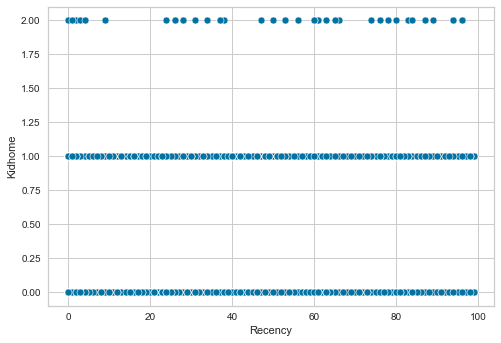

In [21]:
sns.scatterplot( x , y)

In [22]:
y = campaign_df1.Teenhome

In [23]:
x = campaign_df1.Recency

C:\Users\edenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency', ylabel='Teenhome'>

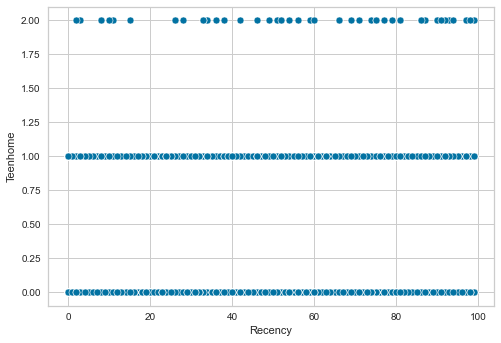

In [24]:
sns.scatterplot( x , y)

In [25]:
y = campaign_df1.Education

C:\Users\edenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency', ylabel='Education'>

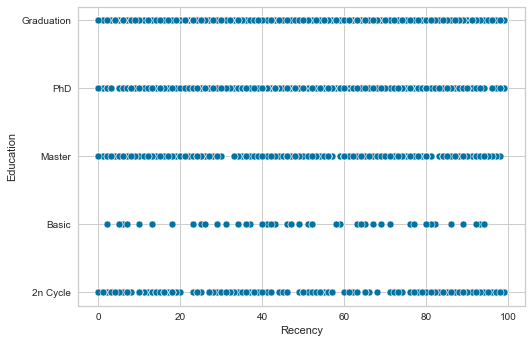

In [26]:
sns.scatterplot( x , y)

In [27]:
y = campaign_df1.Marital_Status

C:\Users\edenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency', ylabel='Marital_Status'>

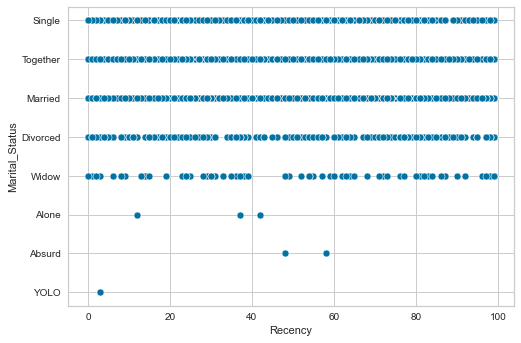

In [28]:
sns.scatterplot( x , y)

In [29]:
le = LabelEncoder()
le.fit(campaign_df1['Education'])
campaign_df1['Education'] = le.transform(campaign_df1['Education'])
campaign_df1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,2,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1
1,2,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0
2,2,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0
3,2,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0
4,4,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0
2236,4,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0
2237,2,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0
2238,3,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0


In [30]:
le = LabelEncoder()
le.fit(campaign_df1['Marital_Status'])
campaign_df1['Marital_Status'] = le.transform(campaign_df1['Marital_Status'])
campaign_df1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1
1,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0
2,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0
3,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0
4,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0
2236,4,5,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0
2237,2,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0
2238,3,5,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0


In [31]:
#let's use the onehotencoder to encode columns
ohe = OneHotEncoder(handle_unknown="ignore").fit(campaign_df).transform(campaign_df)
ohe


<2240x7210 sparse matrix of type '<class 'numpy.float64'>'
	with 64960 stored elements in Compressed Sparse Row format>

In [32]:
pca = PCA(n_components=2)

In [33]:
pca.fit(campaign_df1)

PCA(n_components=2)

In [34]:
pca.explained_variance_ratio_

array([9.99815213e-01, 1.30139681e-04])

In [35]:
pca.singular_values_

array([1184793.39624513,   13517.22748698])

In [36]:
km = KMeans(n_clusters=2).fit(campaign_df1)
km

KMeans(n_clusters=2)

In [37]:
km.predict(campaign_df1)

array([1, 0, 1, ..., 1, 1, 0])

In [38]:
score = silhouette_score(campaign_df1, km.labels_ , metric="euclidean")
score

0.6015478725242586

In [43]:
visualiser_kelbow = KElbowVisualizer(km , k =10)

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

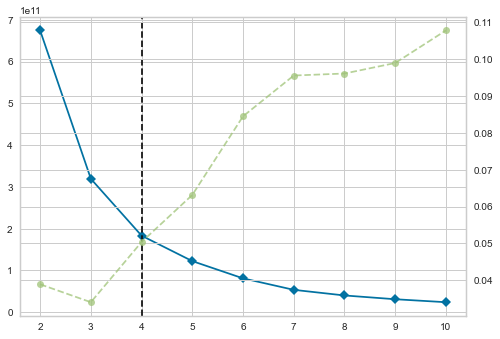

In [44]:
visualiser_kelbow.fit(campaign_df1)

In [41]:
visualiser_kelbow.show()

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

# Customer Segmentation

In [50]:
campaign_df1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1
1,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0
2,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0
3,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0
4,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0
2236,4,5,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0
2237,2,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0
2238,3,5,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0


# Recency-Frequency-Monetary

In [57]:
campaign_df1['Frequency'] = campaign_df1['NumWebPurchases']+campaign_df1['NumCatalogPurchases']+campaign_df1['NumStorePurchases']

In [58]:
campaign_df1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Frequency
0,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,22
1,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,4
2,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,20
3,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,6
4,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,16
2236,4,5,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,15
2237,2,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,18
2238,3,5,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,21


In [80]:
quintiles = campaign_df1[['Recency', 'Frequency', 'Montant']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 19.0, 0.4: 39.0, 0.6: 58.0, 0.8: 79.0},
 'Frequency': {0.2: 5.0, 0.4: 9.0, 0.6: 15.0, 0.8: 20.0},
 'Montant': {0.2: 55.0, 0.4: 195.0, 0.6: 636.0, 0.8: 1174.0}}

In [81]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [82]:
campaign_df1['R'] = campaign_df1['Recency'].apply(lambda x: r_score(x))
campaign_df1['F'] = campaign_df1['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
campaign_df1['M'] = campaign_df1['Montant'].apply(lambda x: fm_score(x, 'Montant'))

In [83]:
campaign_df1['RFM Score'] = campaign_df1['R'].map(str) + campaign_df1['F'].map(str) + campaign_df1['M'].map(str)
campaign_df1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,Complain,Response,Frequency,Montant,R,F,M,RFM Score,Segment
0,2,4,58138.0,0,0,58,635,88,546,172,...,7,0,1,22,1617,3,5,5,355,35
1,2,4,46344.0,1,1,38,11,1,6,2,...,5,0,0,4,27,4,1,1,411,41
2,2,5,71613.0,0,0,26,426,49,127,111,...,4,0,0,20,776,4,4,4,444,44
3,2,5,26646.0,1,0,26,11,4,20,10,...,6,0,0,6,53,4,2,1,421,42
4,4,3,58293.0,1,0,94,173,43,118,46,...,5,0,0,14,422,1,3,3,133,MntMeatProducts


In [87]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

In [88]:
campaign_df1['Segment'] = campaign_df1['R'].map(str) + campaign_df1['F'].map(str)
campaign_df1['Segment'] = campaign_df1['Segment'].replace(segt_map, regex=True)
campaign_df1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,Complain,Response,Frequency,Montant,R,F,M,RFM Score,Segment
0,2,4,58138.0,0,0,58,635,88,546,172,...,7,0,1,22,1617,3,5,5,355,loyal customers
1,2,4,46344.0,1,1,38,11,1,6,2,...,5,0,0,4,27,4,1,1,411,promising
2,2,5,71613.0,0,0,26,426,49,127,111,...,4,0,0,20,776,4,4,4,444,loyal customers
3,2,5,26646.0,1,0,26,11,4,20,10,...,6,0,0,6,53,4,2,1,421,potential loyalists
4,4,3,58293.0,1,0,94,173,43,118,46,...,5,0,0,14,422,1,3,3,133,at risk


C:\Users\edenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


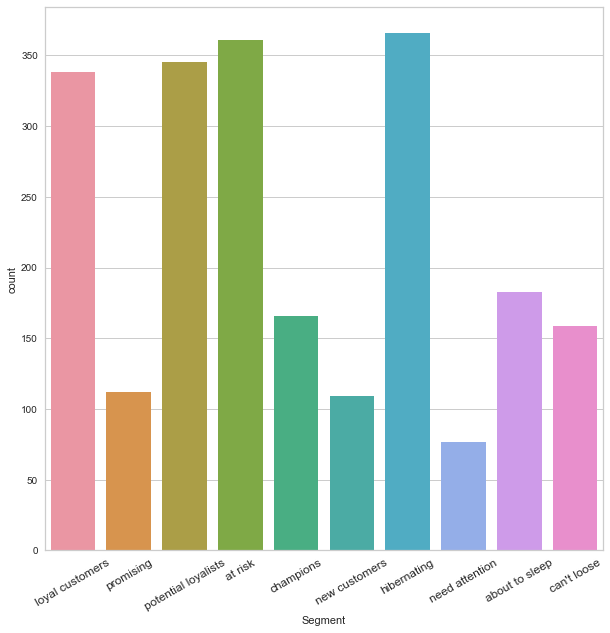

In [89]:
plt.figure(figsize= (10, 10))

sns.countplot(campaign_df1['Segment'])

plt.xticks(fontsize=12, rotation=30)
plt.show()

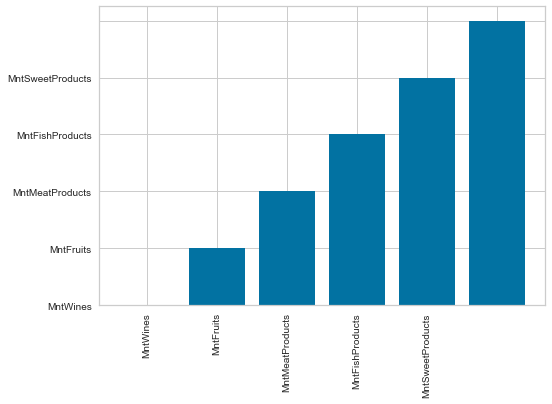

In [115]:

bars = ("MntWines" , "MntFruits" , "MntMeatProducts" , "MntFishProducts" , "MntSweetProducts" , "" )
x_pos = np.arange(len(bars))
 
# Create bars
plt.bar(x_pos, bars)
 
# Rotation of the bar names
plt.xticks(x_pos, bars, rotation=90)
 
# Custom the subplot layout

 
# Show graphic
plt.show()

# Conlusions